In [1]:
import pandas as pd
from itertools import combinations
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    df = pd.read_excel("topic_output.xlsx", sheet_name='Doc')
except Exception as e:
    print("An exception occurred:", str(e))    

In [3]:
df.head()

,Title,Abstract,raw_Abst,Year,Topic,CustomName,probs,Representative_document,Top_n_words
0,Effects of the e-Motivate4Change Program on Me...,lifestyle_behavior adult lag age group health ...,The health behaviors of young adults lag behin...,2020,6,Use of Digital Health for BP control with PA,0.937517,False,blood_pressure - factor - group - physical_act...
1,The Effect of a mHealth App (KENPO-app) for Sp...,smartphone application weight_loss development...,Commercial smartphone apps that promote self-m...,2023,3,Use of apps for Weight loss interventions,0.837636,True,obesity - weight_loss - intervention - program...
2,The effect of a game-based mobile app 'MyHeart...,prevention reduces coronary_heart_disease prog...,Secondary prevention reduces coronary heart di...,2023,4,Use of Digital Health for health-related behav...,1.000000,True,intervention - application - participant - hos...
3,User Engagement and Weight Loss Facilitated by...,intermittent gain popularity year effect weigh...,Intermittent fasting (IF) has gained popularit...,2023,7,Use of Apps for engaging to PA,0.930647,False,physical_activity - application - intervention...
4,Use of coaching and technology to improve bloo...,hypertension cause cardiovascular_disease woma...,Hypertension is the main cause of cardiovascul...,2023,6,Use of Digital Health for BP control with PA,0.000000,False,exercise - application - group - use - health ...


In [4]:
df = df[['Abstract']]

In [5]:
df['word_list'] = df['Abstract'].apply(lambda x: x.split())
df['word_pairs'] = df['word_list'].apply(lambda words_list: [tuple(sorted(pair)) for pair in combinations(words_list, 2) if pair[0] != pair[1] and len(pair[0]) > 1 and len(pair[1]) > 1])

In [7]:
all_text = ' '.join(df['Abstract'])

word_counts = Counter(word for word in all_text.split() if len(word) > 1)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_counts:
    print(f"'{word}': {count} times")

'intervention': 317 times
'diabetes': 302 times
'application': 275 times
'use': 275 times
'health': 249 times
'group': 244 times
'patient': 215 times
'metabolic_syndrome': 190 times
'physical_activity': 172 times
'effect': 168 times
'control': 161 times
'data': 152 times
'care': 146 times
'risk': 138 times
'outcome': 118 times
'management': 117 times
'exercise': 114 times
'level': 104 times
'blood_pressure': 102 times
'telehealth': 100 times
'm-health': 97 times
'obesity': 97 times
'change': 90 times
'increase': 89 times
'factor': 85 times
'device': 83 times
'participant': 82 times
'technology': 80 times
'body': 79 times
'time': 76 times
'measure': 76 times
'program': 74 times
'week': 74 times
'year': 71 times
'month': 69 times
'weight_loss': 69 times
'trial': 69 times
'disease': 68 times
'adult': 66 times
'system': 66 times
'population': 66 times
'model': 66 times
'monitoring': 63 times
'type': 60 times
'age': 59 times
'difference': 57 times
'covid-19': 57 times
'lipid_profile': 56 ti

In [8]:
G = nx.Graph()

for _, row in df.iterrows():
    for pair in row['word_pairs']:
        if 'metabolic_syndrome' not in pair:
            continue
        if G.has_edge(pair[0], pair[1]):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1)

In [9]:
print("Number of nodes :", G.number_of_nodes())
print("Number of edges :", G.number_of_edges())

print("Is connected :", nx.is_connected(G))

if not nx.is_connected(G):
    print("Number of connected components :", nx.number_connected_components(G))

print("Average clustering coefficient :", nx.average_clustering(G))

print("Transitivity :", nx.transitivity(G))

if nx.is_connected(G):
    print("Average shortest path length :", nx.average_shortest_path_length(G))

if nx.is_connected(G):
    print("Diameter :", nx.diameter(G))

print("Density :", nx.density(G))

Number of nodes : 1047
Number of edges : 1046
Is connected : True
Average clustering coefficient : 0.0
Transitivity : 0
Average shortest path length : 1.9980897803247373
Diameter : 2
Density : 0.0019102196752626551


In [10]:
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

for edge in sorted_edges:
    node1, node2, data = edge
    print(f"Node1: {node1}, Node2: {node2}, Weight: {data['weight']}")

Node1: metabolic_syndrome, Node2: risk, Weight: 453
Node1: metabolic_syndrome, Node2: patient, Weight: 407
Node1: metabolic_syndrome, Node2: use, Weight: 381
Node1: metabolic_syndrome, Node2: diabetes, Weight: 341
Node1: metabolic_syndrome, Node2: intervention, Weight: 331
Node1: metabolic_syndrome, Node2: obesity, Weight: 292
Node1: metabolic_syndrome, Node2: data, Weight: 264
Node1: metabolic_syndrome, Node2: health, Weight: 237
Node1: metabolic_syndrome, Node2: application, Weight: 208
Node1: metabolic_syndrome, Node2: group, Weight: 202
Node1: metabolic_syndrome, Node2: factor, Weight: 193
Node1: metabolic_syndrome, Node2: population, Weight: 183
Node1: metabolic_syndrome, Node2: adult, Weight: 179
Node1: metabolic_syndrome, Node2: exercise, Weight: 172
Node1: metabolic_syndrome, Node2: covid-19, Weight: 169
Node1: metabolic_syndrome, Node2: criterion, Weight: 164
Node1: metabolic_syndrome, Node2: care, Weight: 157
Node1: metabolic_syndrome, Node2: blood_pressure, Weight: 156
Node1

In [12]:
node_weights = {node: sum(weight for _, _, weight in G.edges(node, data='weight')) for node in G.nodes()}
sorted_nodes = sorted(node_weights, key=node_weights.get, reverse=True)
top_5_percent = sorted_nodes[:int(0.05 * len(sorted_nodes))]

H = G.subgraph(top_5_percent)

print("Number of nodes in the top 5% network:", H.number_of_nodes())
print("Number of edges in the top 5% network:", H.number_of_edges())

Number of nodes in the top 5% network: 52
Number of edges in the top 5% network: 51


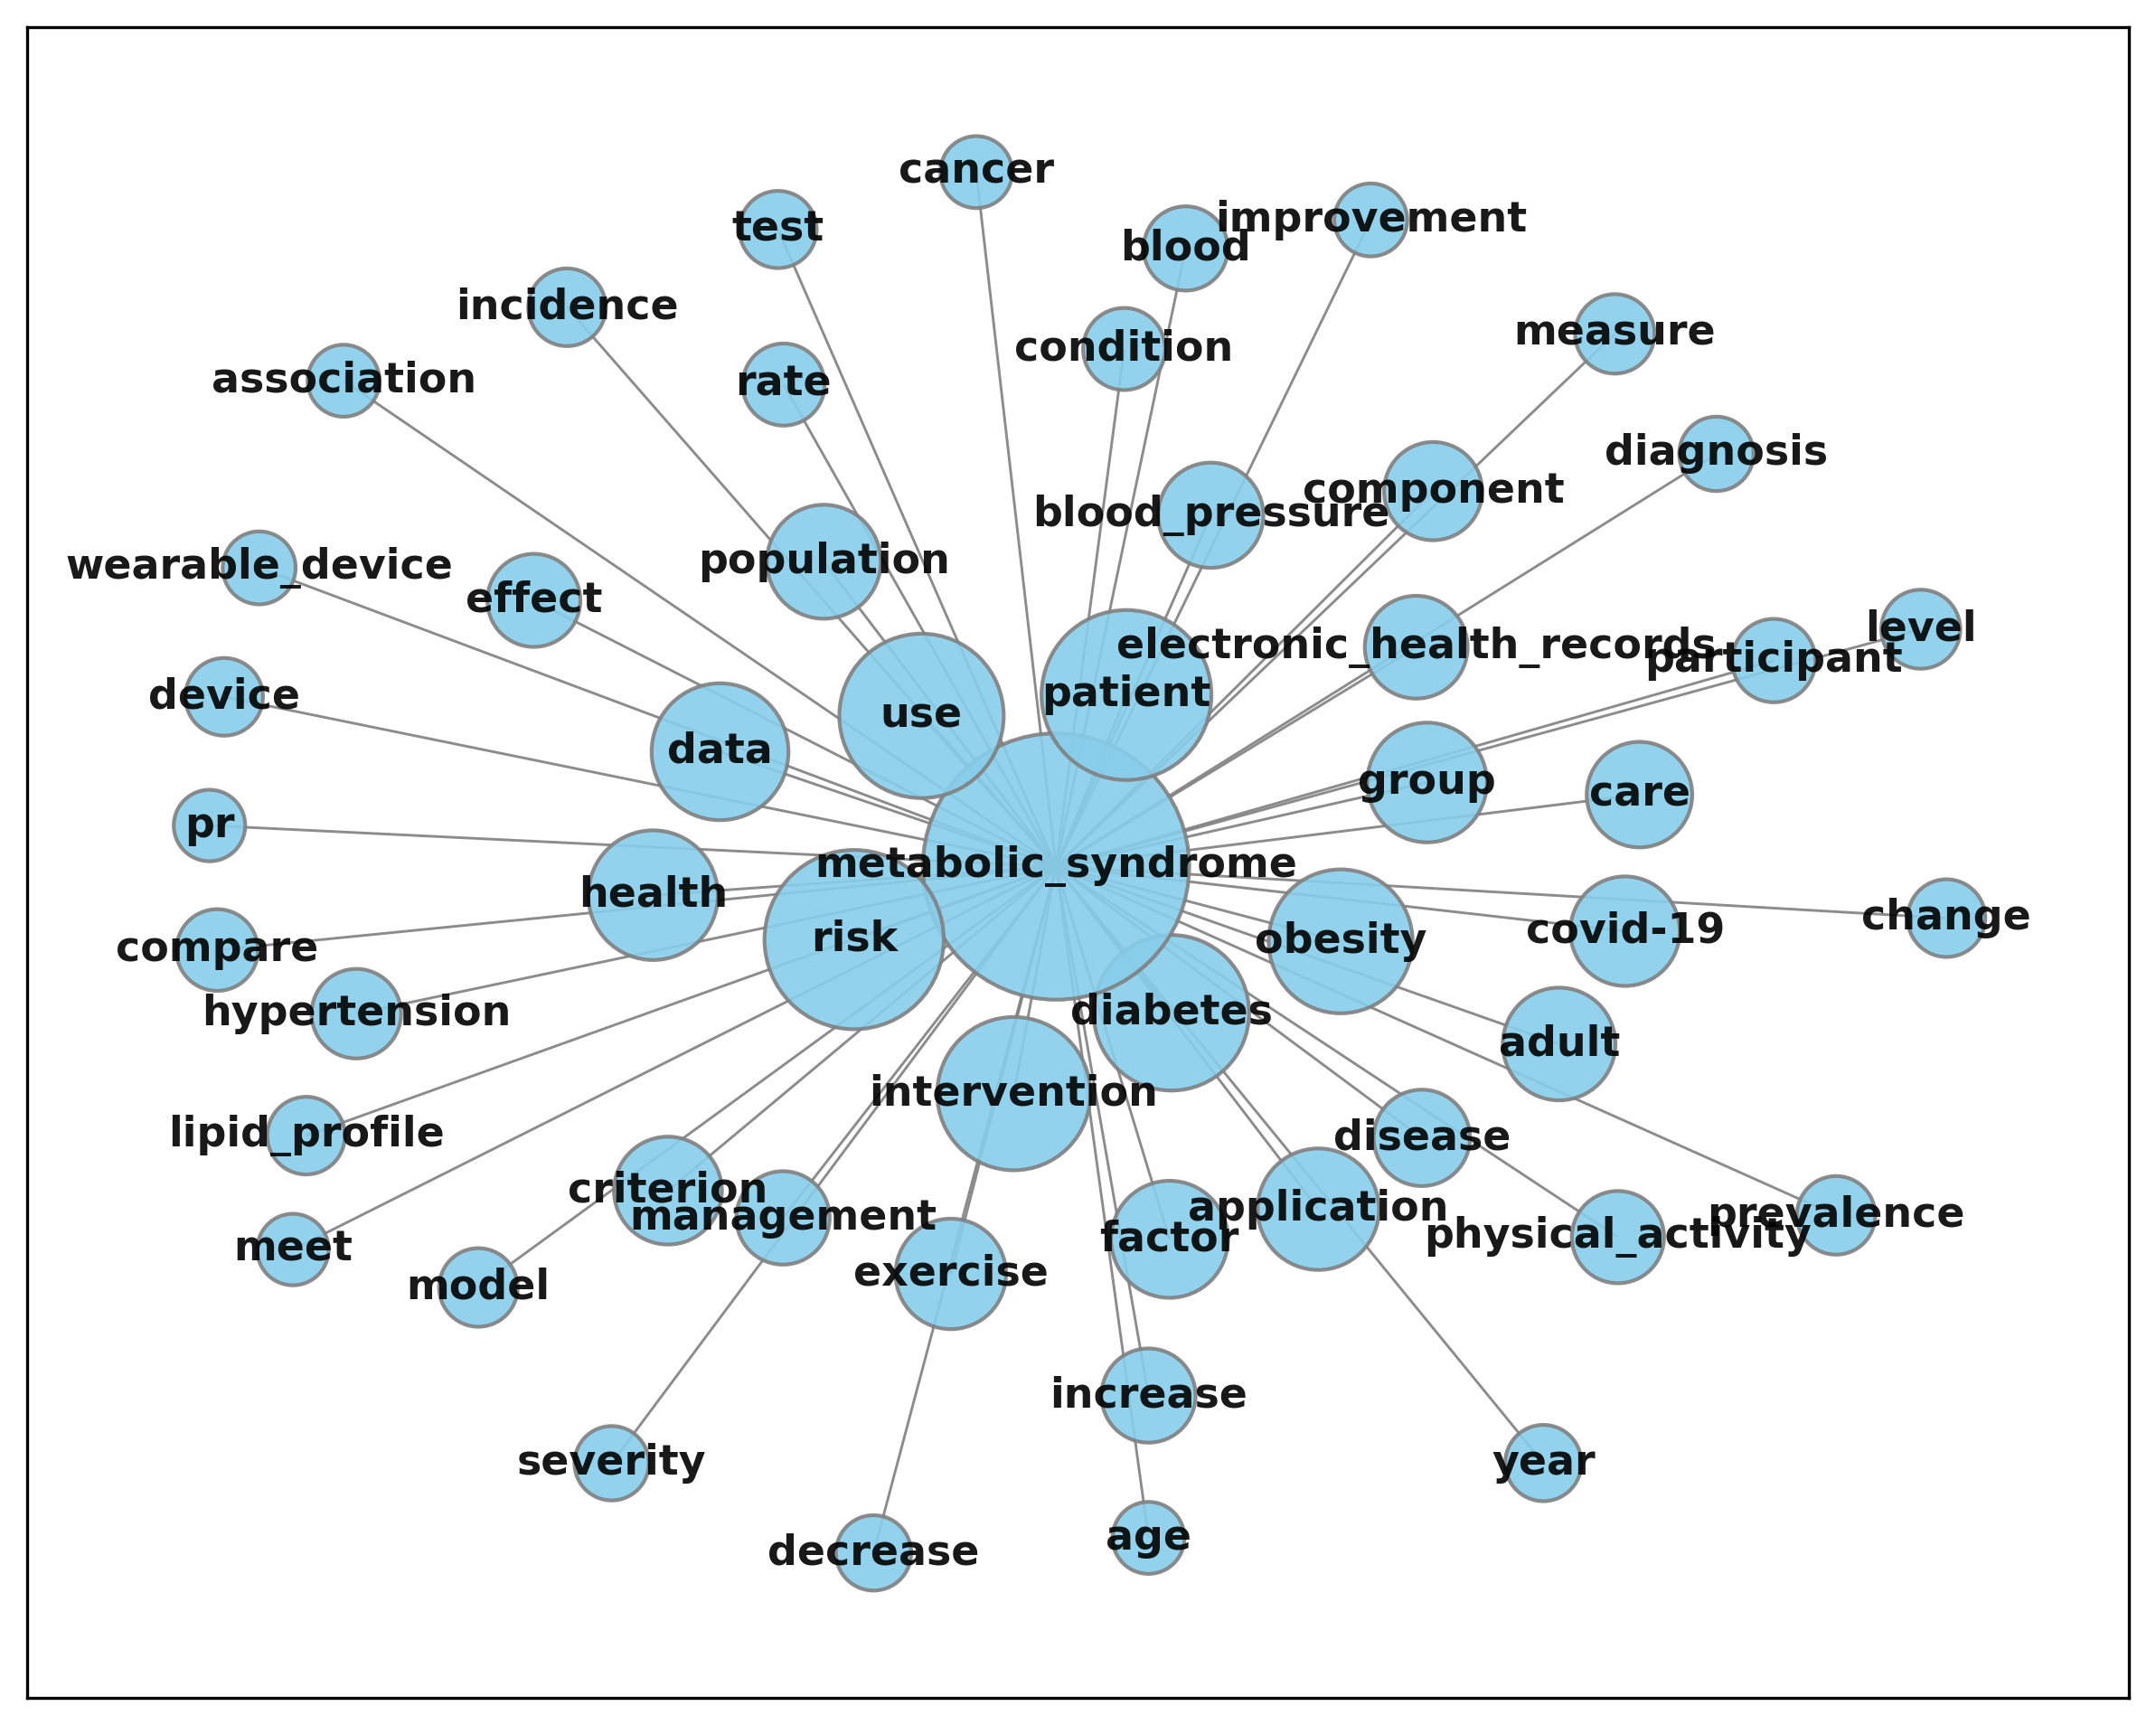

In [17]:
pos = nx.spring_layout(H, k=3.7, seed=42, weight='weight')
max_node_size = 5000
node_sizes = {node: min(sum(data['weight'] for _, _, data in H.edges(node, data=True)) * 5, max_node_size) for node in H.nodes}

plt.figure(figsize=(10, 8), dpi=300)
nx.draw_networkx(
    H,
    pos,
    ## nodes
    node_color='skyblue',
    alpha=0.9,
    edgecolors='gray', #color of node border
    node_size=[node_sizes[node] for node in H.nodes],
    linewidths=1.0, #width of node border
    with_labels=True,
    
    ## labels
    font_color='black',
    font_size=11,
    font_weight='bold',
    horizontalalignment='center',
    verticalalignment='center',
    
    ## edges
    edge_color='gray',
    edge_cmap=plt.cm.spring,
    width=0.7, #width of edge
)

In [18]:
filtered_df = df[df['Abstract'].str.contains('metabolic_syndrome')]

cooccur_count = {}
for text in filtered_df['Abstract']:
    words = text.split()
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            pair = tuple(sorted([words[i], words[j]]))  # 단어 순서에 상관없이 같은 쌍으로 취급
            cooccur_count[pair] = cooccur_count.get(pair, 0) + 1

min_cooccur_freq = 2
cooccur_edges = [(word_pair[0], word_pair[1], freq) for word_pair, freq in cooccur_count.items() if freq >= min_cooccur_freq]

In [20]:
G = nx.Graph()
G.add_weighted_edges_from(cooccur_edges)

print("nodes:", len(G.nodes))
print("edges:", len(G.edges))

nodes: 1047
edges: 34377


In [22]:
degrees = dict(G.degree())

total_nodes = len(G.nodes())
top_5_percent = int(total_nodes * 0.05)
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
top_nodes_with_degree = sorted_degrees[:top_5_percent]
for node, degree in top_nodes_with_degree:
    print(f"Node: {node}, Degree: {degree}")

Node: metabolic_syndrome, Degree: 817
Node: use, Degree: 724
Node: patient, Degree: 644
Node: health, Degree: 610
Node: intervention, Degree: 555
Node: data, Degree: 536
Node: risk, Degree: 526
Node: group, Degree: 503
Node: increase, Degree: 484
Node: application, Degree: 456
Node: effect, Degree: 444
Node: blood_pressure, Degree: 432
Node: disease, Degree: 416
Node: diabetes, Degree: 403
Node: factor, Degree: 399
Node: care, Degree: 395
Node: management, Degree: 393
Node: year, Degree: 391
Node: obesity, Degree: 384
Node: body, Degree: 376
Node: physical_activity, Degree: 376
Node: control, Degree: 360
Node: change, Degree: 348
Node: outcome, Degree: 343
Node: population, Degree: 341
Node: age, Degree: 339
Node: base, Degree: 332
Node: electronic_health_records, Degree: 321
Node: level, Degree: 318
Node: hypertension, Degree: 315
Node: measure, Degree: 315
Node: component, Degree: 311
Node: system, Degree: 308
Node: exercise, Degree: 307
Node: test, Degree: 301
Node: lipid_profile, D

In [23]:
# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_percent_degree = int(0.05 * len(G))
top_nodes_degree_centrality = sorted_degree_centrality[:top_5_percent_degree]

print("Degree Centrality (Top 5%):")
for node, centrality in top_nodes_degree_centrality:
    print(f"Node {node}: {centrality}")

Degree Centrality (Top 5%):
Node metabolic_syndrome: 0.7810707456978967
Node use: 0.6921606118546845
Node patient: 0.615678776290631
Node health: 0.5831739961759081
Node intervention: 0.5305927342256214
Node data: 0.5124282982791587
Node risk: 0.502868068833652
Node group: 0.4808795411089866
Node increase: 0.4627151051625239
Node application: 0.4359464627151051
Node effect: 0.42447418738049714
Node blood_pressure: 0.4130019120458891
Node disease: 0.39770554493307836
Node diabetes: 0.38527724665391966
Node factor: 0.381453154875717
Node care: 0.3776290630975143
Node management: 0.375717017208413
Node year: 0.3738049713193117
Node obesity: 0.36711281070745694
Node body: 0.3594646271510516
Node physical_activity: 0.3594646271510516
Node control: 0.3441682600382409
Node change: 0.3326959847036329
Node outcome: 0.3279158699808795
Node population: 0.3260038240917782
Node age: 0.3240917782026769
Node base: 0.3173996175908222
Node electronic_health_records: 0.3068833652007648
Node level: 0.304

In [24]:
# 2. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_percent_closeness = int(0.05 * len(G))
top_nodes_closeness_centrality = sorted_closeness_centrality[:top_5_percent_closeness]

print("\nCloseness Centrality (Top 5%):")
for node, centrality in top_nodes_closeness_centrality:
    print(f"Node {node}: {centrality}")


Closeness Centrality (Top 5%):
Node metabolic_syndrome: 0.8191072826938136
Node use: 0.7635036496350365
Node patient: 0.7213793103448276
Node health: 0.7048517520215634
Node intervention: 0.6796621182586094
Node data: 0.6713735558408216
Node risk: 0.6670918367346939
Node group: 0.6574481458202388
Node increase: 0.6496894409937888
Node application: 0.6385836385836385
Node effect: 0.6339393939393939
Node blood_pressure: 0.6293622141997594
Node disease: 0.6233611442193087
Node diabetes: 0.618568894145476
Node factor: 0.6171091445427729
Node care: 0.6156562683931724
Node management: 0.6149323927101705
Node year: 0.6142102172636523
Node obesity: 0.6116959064327485
Node body: 0.6088474970896391
Node physical_activity: 0.6088474970896391
Node control: 0.6032295271049596
Node change: 0.5990836197021764
Node outcome: 0.597372929754426
Node population: 0.5966913861950941
Node age: 0.596011396011396
Node base: 0.5936435868331441
Node electronic_health_records: 0.589960518894529
Node level: 0.588

In [25]:
# 3. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_percent_betweenness = int(0.05 * len(G))
top_nodes_betweenness_centrality = sorted_betweenness_centrality[:top_5_percent_betweenness]

print("\nBetweenness Centrality (Top 5%):")
for node, centrality in top_nodes_betweenness_centrality:
    print(f"Node {node}: {centrality}")


Betweenness Centrality (Top 5%):
Node metabolic_syndrome: 0.11716041712821498
Node use: 0.07083074201433916
Node patient: 0.06619673353018102
Node health: 0.041776770205100386
Node data: 0.03423895197432427
Node intervention: 0.03353667395902635
Node risk: 0.029960485168953548
Node group: 0.02859187499093178
Node increase: 0.024390521697845235
Node disease: 0.020434679771661156
Node blood_pressure: 0.01754736423095201
Node obesity: 0.016976321918910808
Node application: 0.01588268519360925
Node effect: 0.014711290449928248
Node care: 0.01379324929335287
Node diabetes: 0.012555346011881076
Node management: 0.01190762947460337
Node physical_activity: 0.011820989313238524
Node factor: 0.010560936681451557
Node body: 0.010552132793169525
Node level: 0.009749443549273798
Node year: 0.00968751615384021
Node outcome: 0.009040759889696782
Node change: 0.008877309692275214
Node system: 0.008684134034448064
Node population: 0.008618919431046087
Node hypertension: 0.008374905355515891
Node bmi: 

In [26]:
result_df = pd.DataFrame({
    "Node": [node for node, _ in top_nodes_degree_centrality],
    "Degree": [G.degree(node) for node, _ in top_nodes_degree_centrality],  # Degree 열 추가
    "Degree Centrality": [centrality for _, centrality in top_nodes_degree_centrality],
    "Closeness Centrality": [centrality for _, centrality in top_nodes_closeness_centrality],
    "Betweenness Centrality": [centrality for _, centrality in top_nodes_betweenness_centrality]
})

In [27]:
result_df.head()

,Node,Degree,Degree Centrality,Closeness Centrality,Betweenness Centrality
0,metabolic_syndrome,817,0.781071,0.819107,0.117160
1,use,724,0.692161,0.763504,0.070831
2,patient,644,0.615679,0.721379,0.066197
3,health,610,0.583174,0.704852,0.041777
4,intervention,555,0.530593,0.679662,0.034239
